In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("HNL_2GeV_TauType_Majorana_Run2Observed.csv")
df.columns
run2_lifetimes = df['2.083379263700694']
run2_limit = df[' 31962.303168294595']

In [3]:
#from Martin

def f_1m_tau(x):
    x0 = np.array([1,2,4,7,10])
    y0 = np.array([30700,963,17.9,0.646,0.0912])/1000.
    return np.exp(np.poly1d(np.polyfit(x0,np.log(y0),4))(x))

## return a function of f(ctau[mm]) = pb for mass m[GeV]
def f_xsec_tau(m):
    def xsec_m_tau(x):
        return f_1m_tau(m)/(x/1000.)
    return xsec_m_tau
## return a function of f(ctau[mm]) = V2  for mass m[GeV]
def f_v2_tau(m):
    def ctau_m_tau(x):
        return f_xsec_tau(m)(x)*4.8759E-05 ## const. between xsec and v^2
    return ctau_m_tau

In [5]:
ctaus = [ 50, 100, 500, 1000, 5000, 10000]
ctaus_theory = np.linspace(1, 10000, 100)
#limits with tightID and statio34 veto, exactly 1 tau

bands_95_lower = [4.1075,1.7291,1.9138,3.0588, 15.0488,34.6777]
bands_68_lower = [5.5617,2.3412,2.5808,4.1249,20.1868, 46.7640]
limits = [7.9062, 3.3821, 3.6562, 5.8438, 28.7500, 66.25]
bands_68_upper = [11.3413,4.7741,5.2594,8.3827,41.2413,95.0342]
bands_95_upper = [15.6575,6.5910,7.2504,11.5729,56.9364,131.2012]

In [6]:
#limits = [54.8750, 15.4375, 11.8438, 18.1250, 75.6250, 133.5000]
#limits_station34 = [19.3750, 6.4062, 5.8906, 7.1250, 40.1250, 71.2500]

In [7]:
theory_xsec = [f_xsec_tau(2)(ctau) for ctau in ctaus_theory]


/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [11]:
theory_xsec_dirac= [f_xsec_tau(2)(ctau/2) for ctau in ctaus_theory]


In [37]:
#try to reverse enginner ctau exclusion point for DELPHI
ctaus_range = np.linspace(450, 470, 100)
ctau_to_v2 = [(f_v2_tau(2)(ctau))*(10**4) for ctau in ctaus_range]
df = pd.DataFrame({'ctau': ctaus_range, 'V2': ctau_to_v2})
df

,ctau,V2
0,450.000000,1.043443
1,450.202020,1.042974
2,450.404040,1.042507
3,450.606061,1.042039
4,450.808081,1.041572
...,...,...
95,469.191919,1.000761
96,469.393939,1.000331
97,469.595960,0.999900
98,469.797980,0.999470


Text(0.5, 1.0, 'Expected Limits for 2 GeV Tau-Type HNL')

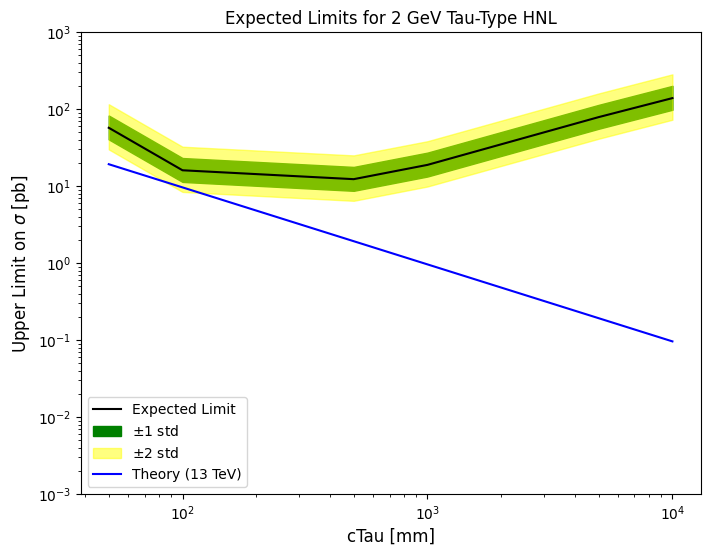

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ctaus, limits, color="black", label="Expected Limit")
plt.fill_between(ctaus, bands_68_lower, bands_68_upper, color="green", alpha=1, label="$\pm$1 std")
plt.fill_between(ctaus, bands_95_lower, bands_95_upper, color="yellow", alpha=0.5, label="$\pm$2 std")
plt.plot(ctaus, theory_xsec, color='blue', label="Theory (13 TeV)" )
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-3, 1e3)
#plt.yscale('log')
plt.xlabel("ctau [mm]", fontsize=12)
plt.ylabel("Upper Limit on $\sigma$ [pb]", fontsize=12)
plt.legend()
plt.title("Expected Limits for 2 GeV Tau-Type HNL")

Text(0.5, 1.0, 'Expected Limits for 2 GeV Tau-Type HNL')

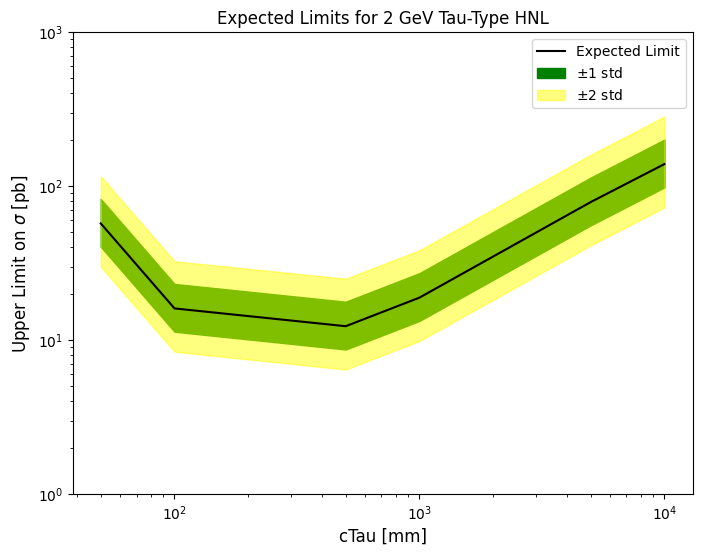

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ctaus, limits, color="black", label="Expected Limit")
plt.fill_between(ctaus, bands_68_lower, bands_68_upper, color="green", alpha=1, label="$\pm$1 std")
plt.fill_between(ctaus, bands_95_lower, bands_95_upper, color="yellow", alpha=0.5, label="$\pm$2 std")
#plt.plot(ctaus, theory_xsec, color='blue', label="Theory (13 TeV)" )
plt.xscale("log")
plt.yscale("log")
plt.ylim(1, 1e3)
# #plt.yscale('log')
plt.xlabel("ctau [mm]", fontsize=12)
plt.ylabel("Upper Limit on $\sigma$ [pb]", fontsize=12)
plt.legend()
plt.title("Expected Limits for 2 GeV Tau-Type HNL")

Text(0.5, 1.0, 'Expected Limits for 2 GeV Tau-Type Majorna HNL')

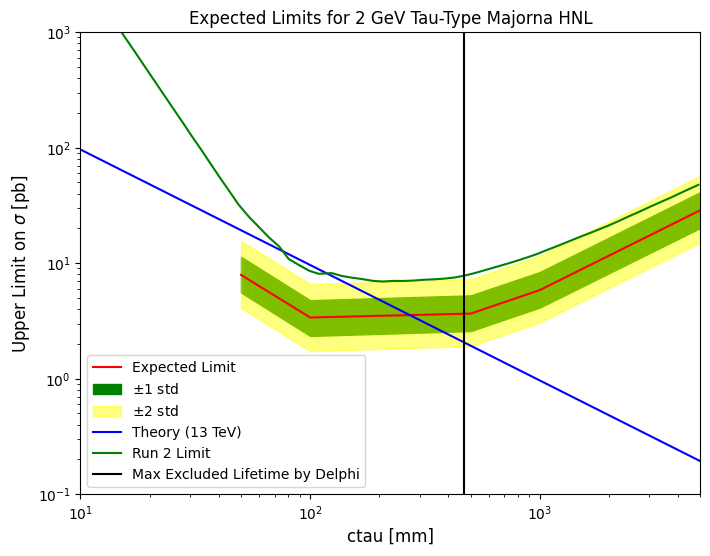

In [9]:
plt.figure(figsize=(8,6))
#plt.plot(ctaus, limits, color="black", label="Original Expected Limit")
plt.plot(ctaus, limits, color="red", label="Expected Limit")
plt.fill_between(ctaus, bands_68_lower, bands_68_upper, color="green", alpha=1, label="$\pm$1 std")
plt.fill_between(ctaus, bands_95_lower, bands_95_upper, color="yellow", alpha=0.5, label="$\pm$2 std")
plt.plot(ctaus_theory, theory_xsec, color='blue', label="Theory (13 TeV)" )
plt.plot(run2_lifetimes, run2_limit, color='green', label="Run 2 Limit")
plt.axvline(469.6, label = "Max Excluded Lifetime by Delphi", color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(10, 0.5e4)
plt.ylim(1e-1, 1e3)
#plt.yscale('log')
plt.xlabel("ctau [mm]", fontsize=12)
plt.ylabel("Upper Limit on $\sigma$ [pb]", fontsize=12)
plt.legend()
plt.title("Expected Limits for 2 GeV Tau-Type Majorna HNL")

Text(0.5, 1.0, 'Expected Limits for 2 GeV Tau-Type Dirac HNL')

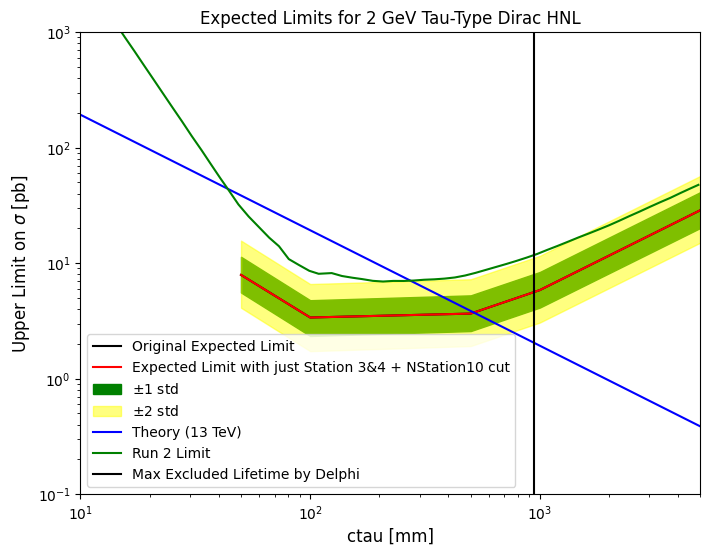

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ctaus, limits, color="black", label="Original Expected Limit")
plt.plot(ctaus, limits, color="red", label="Expected Limit with just Station 3&4 + NStation10 cut")
plt.fill_between(ctaus, bands_68_lower, bands_68_upper, color="green", alpha=1, label="$\pm$1 std")
plt.fill_between(ctaus, bands_95_lower, bands_95_upper, color="yellow", alpha=0.5, label="$\pm$2 std")
plt.plot(ctaus_theory, theory_xsec_dirac, color='blue', label="Theory (13 TeV)" )
plt.plot(run2_lifetimes, run2_limit, color='green', label="Run 2 Limit")
plt.axvline(469.6*2, label = "Max Excluded Lifetime by Delphi", color='black')
plt.xscale("log")
plt.yscale("log")
plt.xlim(10, 0.5e4)
plt.ylim(1e-1, 1e3)
#plt.yscale('log')
plt.xlabel("ctau [mm]", fontsize=12)
plt.ylabel("Upper Limit on $\sigma$ [pb]", fontsize=12)
plt.legend()
plt.title("Expected Limits for 2 GeV Tau-Type Dirac HNL")